*Page and Latex Commands*
$\newcommand{\C}{\mathbb{C}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\Z}{\mathbb{Z}}
\newcommand{\N}{\mathbb{N}}
\newcommand{\Q}{\mathbb{Q}}
\newcommand{\mP}{\mathcal{P}}
\newcommand{\bp}{\begin{pmatrix}}
\newcommand{\ep}{\end{pmatrix}}
$

In [1]:
# Python Imports
%matplotlib notebook
import math; import matplotlib.pyplot as plt; from mpl_toolkits.mplot3d import Axes3D; import numpy as np; import pandas as pd; from cvxopt import matrix, solvers

### Game Theory in the Restaurant

**Location Analysis: A Skew Symmetric Zero Sum Game**

Discrete line game.

In [2]:
#Determine game matrix with n possible positions
n=10
def f(x,y,n):
    if x==y:
        return 0
    if y>x:
        return y+x-n
    return n-x-y
A = np.array([[f(x,y,n) for x in range(n+1)] for y in range(n+1)])
print(A)

[[ 0  9  8  7  6  5  4  3  2  1  0]
 [-9  0  7  6  5  4  3  2  1  0 -1]
 [-8 -7  0  5  4  3  2  1  0 -1 -2]
 [-7 -6 -5  0  3  2  1  0 -1 -2 -3]
 [-6 -5 -4 -3  0  1  0 -1 -2 -3 -4]
 [-5 -4 -3 -2 -1  0 -1 -2 -3 -4 -5]
 [-4 -3 -2 -1  0  1  0 -3 -4 -5 -6]
 [-3 -2 -1  0  1  2  3  0 -5 -6 -7]
 [-2 -1  0  1  2  3  4  5  0 -7 -8]
 [-1  0  1  2  3  4  5  6  7  0 -9]
 [ 0  1  2  3  4  5  6  7  8  9  0]]


Skew symmetric matrix then $v(A)=0$ and if $X^*$ is optimal for player 1 then it is optimal for player 2.

Verify that the $v(A)=0$.

A saddle point in pure strategies iff 
$$v^-=\max_i\min_j a_{ij} = \min_j\max_i a_{ij}=v^+$$

In [3]:
print("v_min:=max({})".format(A.min(0)))
print("v_max:=min({})".format( A.max(1)))
print("v_min={}".format(A.min(0).max()))
print("v_max={}".format(A.max(1).min()))

v_min:=max([-9 -7 -5 -3 -1  0 -1 -3 -5 -7 -9])
v_max:=min([9 7 5 3 1 0 1 3 5 7 9])
v_min=0
v_max=0


Notice additionally that the saddle point is pure and at $(5,5)$.

Can be naturally extended to:

+ infintely many positions along an interval
+ infintely many players (assuming infinitely many positions along the interval)
+ 2D spatial orientation with Euclidean geometry
+ any other 'metric'

Check out the saddle point.

<IPython.core.display.Javascript object>


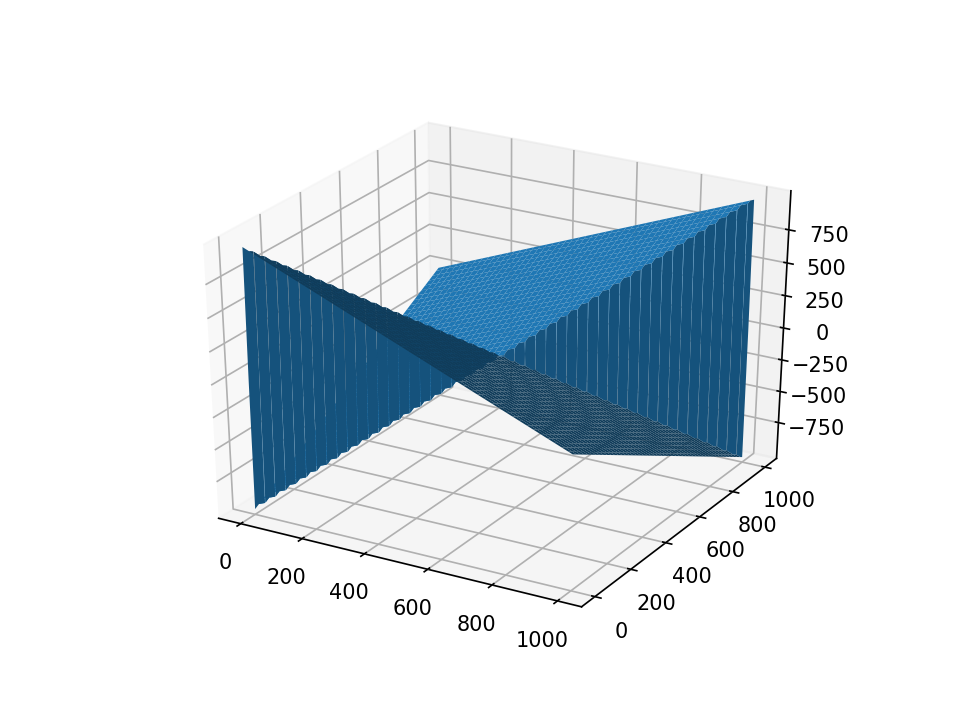

In [4]:
N=1000
f_3d = lambda x,y : math.copysign(x-y,(10-x-y))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x,y=np.linspace(0,N,N+1),np.linspace(0,N,N+1)
x,y=np.meshgrid(x,y)
A = np.sign(x-y)*(N-x-y)
ax.plot_surface(x, y, A)

Same analysis applies.

In [5]:
print("v_min:=max({})".format(A.min(0)))
print("v_max:=min({})".format( A.max(1)))
print("v_min={}".format(A.min(0).max()))
print("v_max={}".format(A.max(1).min()))

v_min:=max([-999. -997. -995. ... -995. -997. -999.])
v_max:=min([999. 997. 995. ... 995. 997. 999.])
v_min=0.0
v_max=0.0


**Effort Analysis: Known Strategy Zero Sum Game**

In each weekly meeting you are to divise a weekly focus for your staff. Suppose that we have a fixed percentage of what is being taken by taxes etc like a percentage of loss. Calculate optimal strategy for minimizing loss. Strategies for choice add up to 100% effort. A positive number means that you lose money, a negative number means that you gain a little bit from your average. Zero means you will pay the same amount. You are playing against a known strategy.

| Item | Percent Expenditure |
| --- | --- |
| Advertising | 5% |
| Bank Charges| 2% |
| Credit Charges | 3 % |
| Insurance | 20% |
| Legal & Accounting | 15% |
| Maintenance | x% |
| Rent | y% |
| Supplies | z% |
| Salaries | s% |
| Utilities | t% |
| Taxes | u% |

In [6]:
effort = pd.read_csv('effort.csv',index_col=0)
effort.head()

,Advertizing,Bank Charges,Credit Charges,Insurance,Legal/Accounting,Maintenance,Rent,Supplies,Salaries,Utilities
Efforts,,,,,,,,,,
Service Quality,-1,0,2,0,-1,2,0,1,1,2
Diverse Menu,-2,0,0,0,0,0,0,0,0,0
Service Time,0,0,3,0,1,0,0,2,0,3
Higher Capacity,0,0,4,0,2,3,0,2,2,2
Lower Capacity,0,0,-1,0,-1,-1,0,-1,-1,-1


**Daily Specials Game: Non-Symmetric Zero Sum Games**

Suppose two restaurants in pure competition (zero-sum game) with similar menu's (same action set) are offering a daily special on one menu item. If they offer the same special then the customers are evenly divided. If they offer different menu items then they recieve a share of the customer base that is closest to prefering that menu item. For example offering a hamberger in one restaurant vs another restaurant evenly divides the consumer base because they are opposite end of the spectrum. However if offered a burger at one restaurant vs a chicken sandwich at the second restaurant then the first restaurant will win the consumer base because the items are not sufficently diverse for the competition to be pure.

(Randomly generated data for daily specials)

`import numpy.random as rand
N = 15
A = np.array([[rand.randint(11)-5 for _ in range(N)] for _ in range(N)])
names = pd.from_csv('specials.csv')
specials=pd.DataFrame(A)
specials.columns = names.columns
specials.index = names.index
specials.to_csv('specials1.csv')`

In [7]:
specials = pd.read_csv('specials.csv',index_col=0)
specials.head()

,Burger,Wings,Veggie,Burger_Soda,Wings_Soda,Veggie_Soda,Burger_Hefeweizen,Wings_Hefeweizen,Veggie_Hefeweizen,Burger_Pilsner,Wings_Pilsner,Veggie_Pilsner,Burger_Lager,Wings_Lager,Veggie_Lager
P1_P2,,,,,,,,,,,,,,,
Burger,0,3,-4,-3,5,5,-1,5,-2,-1,2,0,2,3,-6
Wings,-2,2,-1,-3,-2,-2,0,-3,1,3,-5,0,-3,-4,-5
Veggie,1,-5,-4,-3,4,4,-3,-4,2,-4,-4,5,-2,1,-4
Burger_Soda,2,3,-5,1,-1,-4,4,1,4,4,2,-3,1,1,-3
Wings_Soda,-1,2,1,3,3,1,-3,-4,4,-4,3,3,1,1,-2


In [8]:
A=specials.values
print(A)

[[ 0  3 -4 -3  5  5 -1  5 -2 -1  2  0  2  3 -6]
 [-2  2 -1 -3 -2 -2  0 -3  1  3 -5  0 -3 -4 -5]
 [ 1 -5 -4 -3  4  4 -3 -4  2 -4 -4  5 -2  1 -4]
 [ 2  3 -5  1 -1 -4  4  1  4  4  2 -3  1  1 -3]
 [-1  2  1  3  3  1 -3 -4  4 -4  3  3  1  1 -2]
 [ 1 -2 -3  4  5 -2  4  4  5 -2 -4 -2 -2 -5 -1]
 [-5 -2  4 -4  3 -2  3 -2  3 -1  3 -4 -3  4  0]
 [ 4 -4  4  4 -5 -5 -4  0  4 -4 -4  5 -4  4  1]
 [-3  3  0 -4  3  3  2 -4 -5 -5  4  4  5  2  2]
 [ 2 -4  4  3  1  1 -5  1 -2  2 -2  3  1 -3  3]
 [ 4  3  2 -3 -5  3  4  0  2  3  3 -4  5  0  4]
 [-3  3  1 -5  3 -2 -3  1 -5 -1  5  4 -1 -5  5]
 [-4  5 -3 -4 -4  4  5  2  3  3 -5  0 -4  4  6]
 [-5 -1  4  1  4  4 -3  0  3 -1 -2  0  5  1  7]
 [-3  0 -3 -4  5  5  4  2  3  0  3 -5  1  1  0]]


In [9]:
print("v_min:=max({})".format(A.min(0)))
print("v_max:=min({})".format( A.max(1)))
print("v_min={}".format(A.min(0).max()))
print("v_max={}".format(A.max(1).min()))

v_min:=max([-5 -5 -5 -5 -5 -5 -5 -4 -5 -5 -5 -5 -4 -5 -6])
v_max:=min([5 3 5 4 4 5 4 5 5 4 5 5 6 7 5])
v_min=-4
v_max=3


[game theory adaptation of lp](https://medium.com/@excitedAtom/linear-programming-in-python-cvxopt-and-game-theory-8626a143d428)

For our row player we want to take $\min_y\max_x y^TMx$, which is equivalent to

$$\begin{align*}
\min\quad &v\\ 
\text{s.t.}\quad &ve - M^Ty\geq 0\\
& e^Ty=1\\
& y\geq 0
\end{align*}$$

When using `solvers.lp` we are solving for

$$\begin{align*}
\min\quad &c\cdot x\\ 
\text{s.t.}\quad &Gx\leq h\\
& Ax=b\\
\end{align*}$$


To integrate the two problems, we form the following relations
$$c=\bp -1 & \mathbb{0} \ep \quad x=\bp v & y \ep\quad  G=\bp \mathbb{1} & -M^T \\ 0 & I_n \ep \quad A = \bp 0 & \mathbb{1} \ep \quad h = \mathbb{0} \quad b=1$$ 

In [10]:
def maxmin(A, solver="glpk"):
    n,m = A.shape
    # minimize matrix c
    c = [-1] + [0 for i in range(n)]
    c = np.array(c, dtype="float")
    c = matrix(c)
    # constraints G*x <= h
    G = np.matrix(A, dtype="float").T # reformat each variable is in a row
    G *= -1 # minimization constraint
    G = np.vstack([G, np.eye(n) * -1]) # > 0 constraint for all vars
    new_col = [1 for i in range(m)] + [0 for i in range(n)]
    G = np.insert(G, 0, new_col, axis=1) # insert utility column
    G = matrix(G)
    h = ([0 for i in range(n)] + 
         [0 for i in range(m)])
    h = np.array(h, dtype="float")
    h = matrix(h)
    # contraints Ax = b
    A = [0] + [1 for i in range(m)]
    A = np.matrix(A, dtype="float")
    A = matrix(A)
    b = np.matrix(1, dtype="float")
    b = matrix(b)
    sol = solvers.lp(c=c, G=G, h=h, A=A, b=b, solver=solver)
    return sol

For our column player we want to take $\max_x\min_y y^TMx$, which is equivalent to

$\begin{align*}
\max\quad &v\\ 
\text{s.t.}\quad &ve - Mx\leq 0\\
& e^Tx=1\\
& y\geq 0
\end{align*}$

To integrate the two problems, we form the following relations
$$c=\bp -1 & \mathbb{0} \ep \quad x=\bp v & x \ep\quad  G=\bp \mathbb{1} & -M \\ 0 & I_m \ep \quad A = \bp 0 & \mathbb{1} \ep \quad h = \mathbb{0} \quad b=1$$ 

In [11]:
def minmax(A, solver="glpk"):
    n,m = A.shape
    # minimize matrix c
    c = [-1] + [0 for i in range(n)]
    c = np.array(c, dtype="float")
    c = matrix(c)
    # constraints G*x <= h
    G = np.matrix(A, dtype="float") # reformat each variable is in a row
    G *= -1 # minimization constraint
    G = np.vstack([G, np.eye(n) * -1]) # > 0 constraint for all vars
    new_col = [1 for i in range(m)] + [0 for i in range(n)]
    G = np.insert(G, 0, new_col, axis=1) # insert utility column
    G = matrix(G)
    h = ([0 for i in range(n)] + 
         [0 for i in range(m)])
    h = np.array(h, dtype="float")
    h = matrix(h)
    # contraints Ax = b
    A = [0] + [1 for i in range(m)]
    A = np.matrix(A, dtype="float")
    A = matrix(A)
    b = np.matrix(1, dtype="float")
    b = matrix(b)
    sol = solvers.lp(c=c, G=G, h=h, A=A, b=b, solver=solver)
    return sol

Do some work to make it look nice. What follows are the probabilities of having a special on a given day.

In [12]:
sol = maxmin(A=A, solver="glpk")
probs = sol["x"]
print("Game value: {}".format(round(probs[0],2)))
solution = pd.DataFrame([ round(x,2) for x in list(probs*100)[1:]]) 
solution.index = specials.columns
print(solution)
print('total = {}'.format(solution.sum()))

Game value: 0.3
                       0
Burger              4.89
Wings               0.00
Veggie              0.00
Burger_Soda        22.03
Wings_Soda          0.00
Veggie_Soda         5.82
Burger_Hefeweizen   0.30
Wings_Hefeweizen    8.54
Veggie_Hefeweizen  14.94
Burger_Pilsner     19.06
Wings_Pilsner      12.60
Veggie_Pilsner      0.00
Burger_Lager        0.94
Wings_Lager        10.87
Veggie_Lager        0.00
total = 0    99.99
dtype: float64


In [13]:
sol = minmax(A=A, solver="glpk")
probs = sol["x"]
print("Game value: {}".format(round(probs[0],2)))
solution = pd.DataFrame([ round(x,2) for x in list(probs*100)[1:]]) 
solution.index = specials.columns
print(solution)
print('total = {}'.format(solution.sum()))

Game value: 0.3
                       0
Burger             -0.00
Wings              14.92
Veggie             12.37
Burger_Soda         0.00
Wings_Soda         12.93
Veggie_Soda         4.78
Burger_Hefeweizen   2.83
Wings_Hefeweizen    0.00
Veggie_Hefeweizen  21.52
Burger_Pilsner      9.94
Wings_Pilsner       0.00
Veggie_Pilsner     19.64
Burger_Lager        1.07
Wings_Lager        -0.00
Veggie_Lager       -0.00
total = 0    100.0
dtype: float64
